# Wine Quality Prediction

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_curve, auc

In [2]:
# Dataset
wine = pd.read_csv(r'C:\Users\Tanmayee\OneDrive\Documents\Personal\Other\AI\Tony\Wine Prediction.txt')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Information about dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Counting the different qualities of wines
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

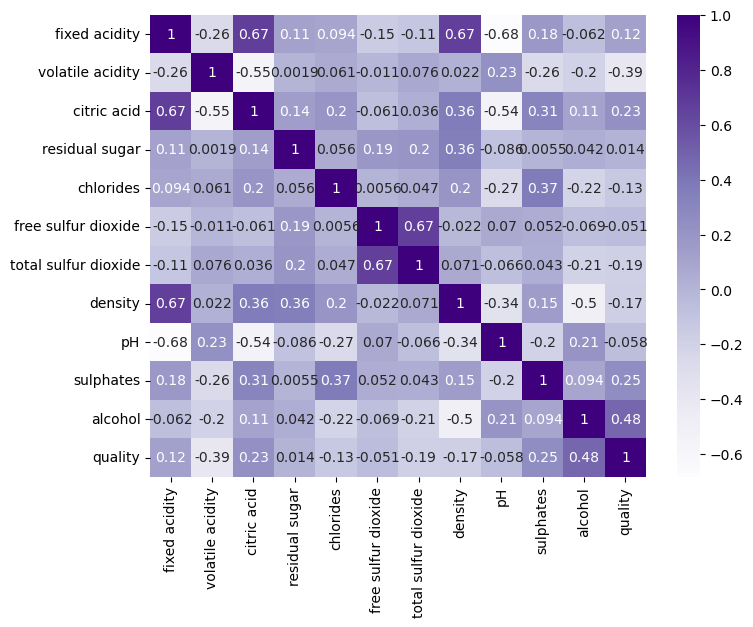

In [5]:
# Creating the heatmap for datset
plt.figure(figsize=(8,6))
sns.heatmap(data=wine.corr(),cmap='Purples',annot=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

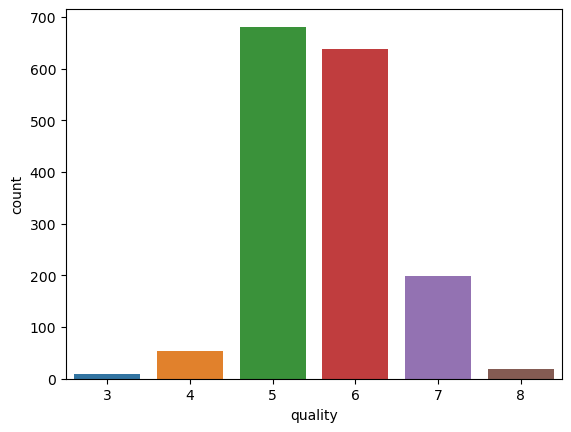

In [6]:
# The available qualities of the wines are plotted using the seaborn library
sns.countplot(x='quality',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

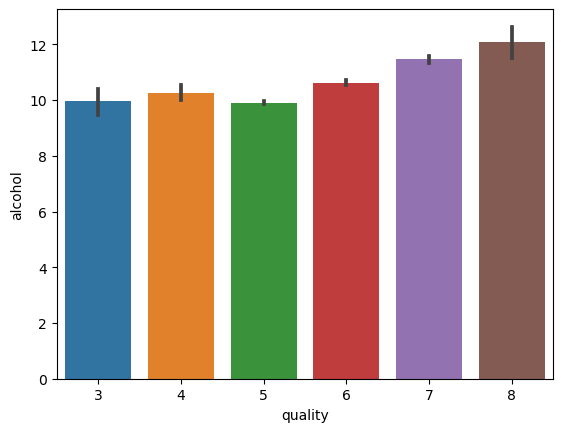

In [7]:
# X axis represents the quality of wine and y represents the % of alocohol present
sns.barplot(data=wine,y='alcohol',x='quality')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

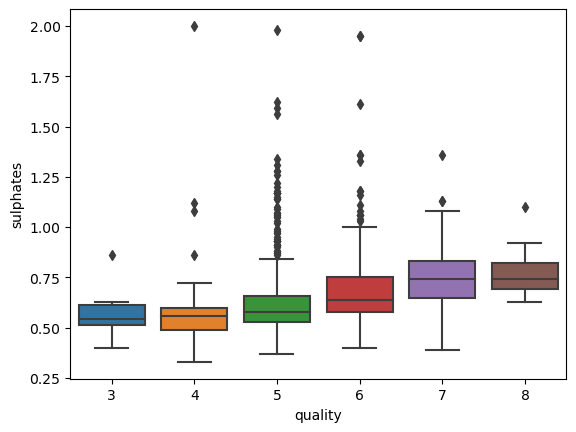

In [8]:
# Quality of wine and contents of sulphur in it are displayed
sns.boxplot(data=wine,y='sulphates',x='quality')

In [9]:
# Dropping the two columns quality and volatile acidity to divide the dataset into Train and Test
w_x=wine.drop(columns=['quality','volatile acidity'],axis=1)
w_x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [10]:
# Pre-processing function to standardize the given data
ss=StandardScaler()

In [11]:
# below code fits the StandardScaler() object to the data w_x and then transforms the data using the learned parameters
w_x=ss.fit_transform(w_x)
w_x

array([[-0.52835961, -1.39147228, -0.45321841, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743, -1.39147228,  0.04341614, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743, -1.18607043, -0.16942723, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.72391627, -0.16942723, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528, -0.77526673, -0.38227061, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223,  1.02199944,  0.75289408, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [12]:
# Creating a new variable to store the quality of wine 
w_y=wine['quality'].apply(lambda w_y:1 if w_y>=7 else 0)
w_y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [13]:
# Train and Test
wx_train,wx_test,wy_train,wy_test=train_test_split(w_x,w_y,test_size=0.2,random_state=1)

### Logistic Regression Algorithm

In [14]:
# Logistic Regression
lr=LogisticRegression()

# Making the model of Logistic Regression Ready
model1=lr.fit(wx_train,wy_train)

# Predicting the quality of wine
wy1_pred=lr.predict(wx_test)

# Finding the accuracy of trained model
acc1 = accuracy_score(wy_test,wy1_pred)
print("Accuracy Score of Logistic Regression",acc1)

Accuracy Score of Logistic Regression 0.89375


### Finding the F1 score for Logistic Regression Model

In [15]:
f1_lr = f1_score(wy_test, wy1_pred)
print("F1 score:", f1_lr)

F1 score: 0.32


### ROC for Logistic Regression Model

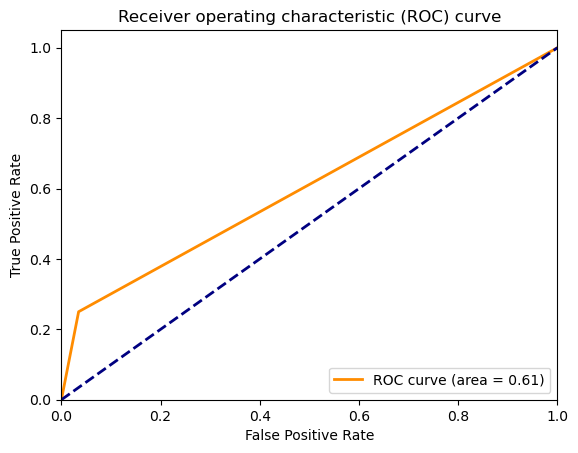

In [16]:
f1, t1, thresholds = roc_curve(wy_test, wy1_pred)
roc_auc1 = auc(f1, t1)

plt.figure()
plt.plot(f1, t1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### AdaBoost Classifier

In [17]:
# Training the model
abc=AdaBoostClassifier()

# Fitting the chosen model on given data
abc.fit(wx_train,wy_train)

# Predicting the quality using AdaBoost Classifier
wy2_pred=abc.predict(wx_test)

# Accuracy Score
acc2 = accuracy_score(wy_test,wy2_pred)
print("Accuracy of AdaBoost Classifier",acc2)

Accuracy of AdaBoost Classifier 0.86875


### F1 Score of AdaBoost

In [18]:
f1_abc = f1_score(wy_test, wy2_pred)
print("F1 score:", f1_abc)

F1 score: 0.30000000000000004


### Roc Curve of AdaBoost

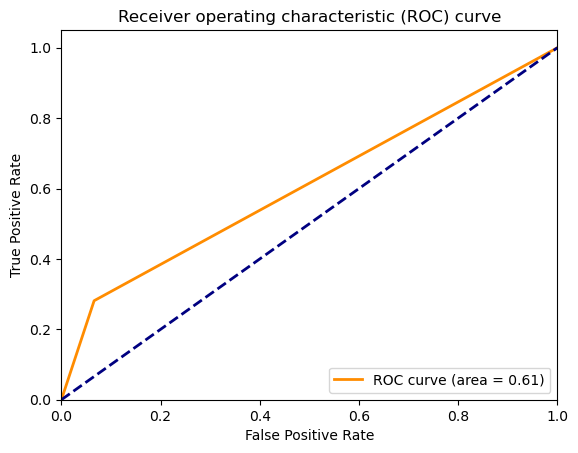

In [19]:
f2, t2, thresholds = roc_curve(wy_test, wy2_pred)
roc_auc2 = auc(f2, t2)

plt.figure()
plt.plot(f2, t2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [20]:
# Training the Random Forest Classifier Model
rf=RandomForestClassifier(max_depth=10,criterion='entropy',n_estimators=10)

# Fitting the model
model3=rf.fit(wx_train,wy_train)

# Predicting the values using Random Forest Classifier
wy3_pred=rf.predict(wx_test)

# Finding the accuracy
acc3 = accuracy_score(wy3_pred,wy_test)
print("Accuracy of Random Forest", acc3)

Accuracy of Random Forest 0.915625


### F1 Score of Random Forest

In [21]:
f1_rf = f1_score(wy_test, wy3_pred)
print("F1 score:", f1_rf)

F1 score: 0.5423728813559322


### Plotting the graph of ROC Curve for Random Forest

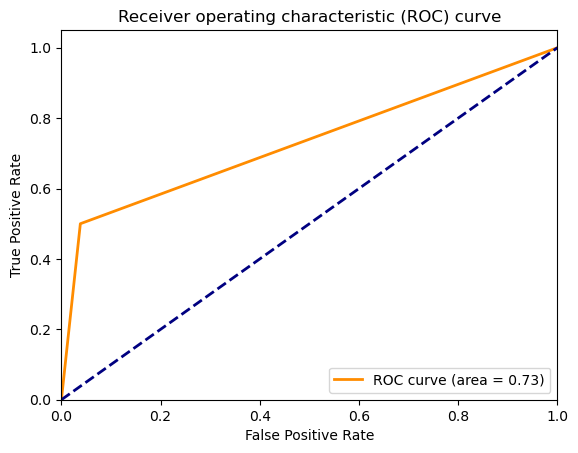

In [22]:
f3, t3, thresholds = roc_curve(wy_test, wy3_pred)
roc_auc3 = auc(f3, t3)

plt.figure()
plt.plot(f3, t3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier

In [23]:
# Training the Model 
decision=DecisionTreeClassifier(random_state = 8)

# Fitting the model
mo4 = decision.fit(wx_train,wy_train)

# Predicting the values 
wy4_pred = mo4.predict(wx_test)

# Finding the accuracy
acc4=accuracy_score(wy4_pred,wy_test)
print("Accuracy of Decision Tree Classifier",acc4)

Accuracy of Decision Tree Classifier 0.921875


### Calculating F1 Score

In [24]:
f1_dt = f1_score(wy_test, wy4_pred)
print("F1 score:", f1_dt)

F1 score: 0.626865671641791


### Plotting the ROC Curve

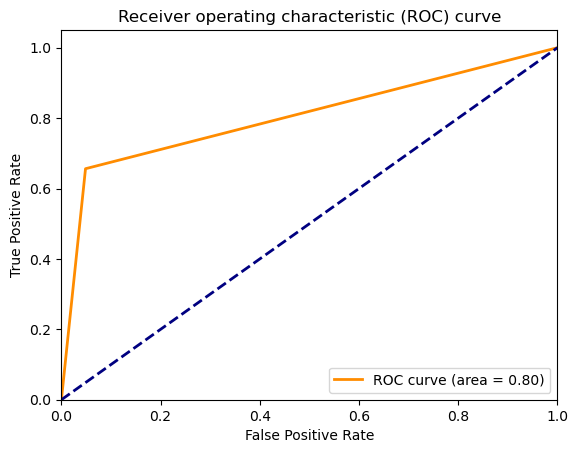

In [25]:
f4, t4, thresholds = roc_curve(wy_test, wy4_pred)
roc_auc4 = auc(f4, t4)

plt.figure()
plt.plot(f4, t4, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
# creating list of model names and their corresponding accuracies
models = ['Logistic Regression', 'AdaBoost Classifier', 'Random Forest', 'Decision Tree']
accuracies = [acc1, acc2, acc3, acc4]

### Plotting the Graph of accuracy

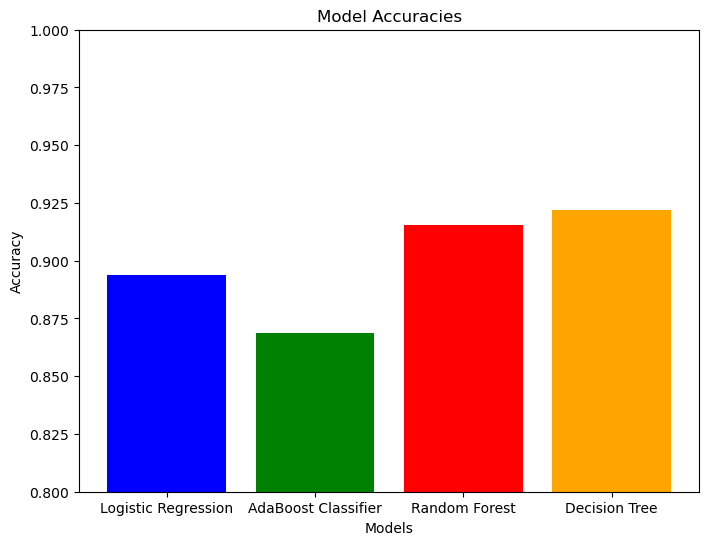

In [27]:
# plot the accuracies as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.ylim(0.8, 1.0)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [28]:
models = ['Logistic Regression','AdaBoost Classifier', 'Random Forest', 'Decision Tree']
f1_score = [f1_lr, f1_rf, f1_abc, f1_dt]
f1_score

[0.32, 0.5423728813559322, 0.30000000000000004, 0.626865671641791]

### Plotting Accuracies

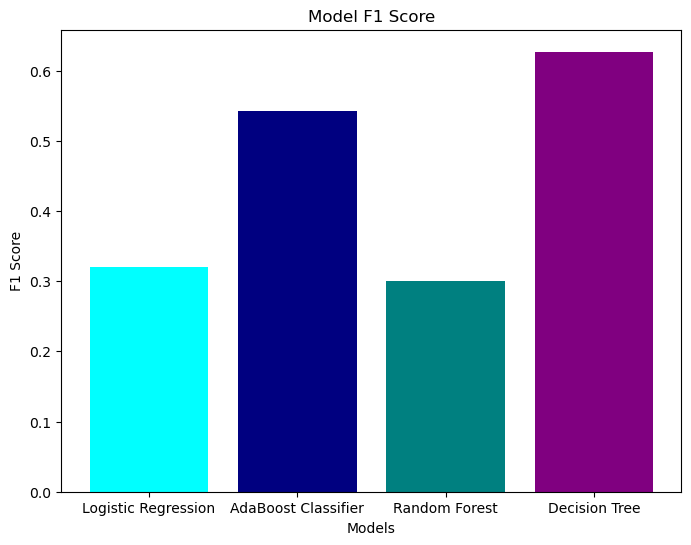

In [29]:
# plot the accuracies as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, f1_score, color=['aqua', 'navy', 'teal', 'purple'])
plt.title('Model F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

### Plotting ROC Curve

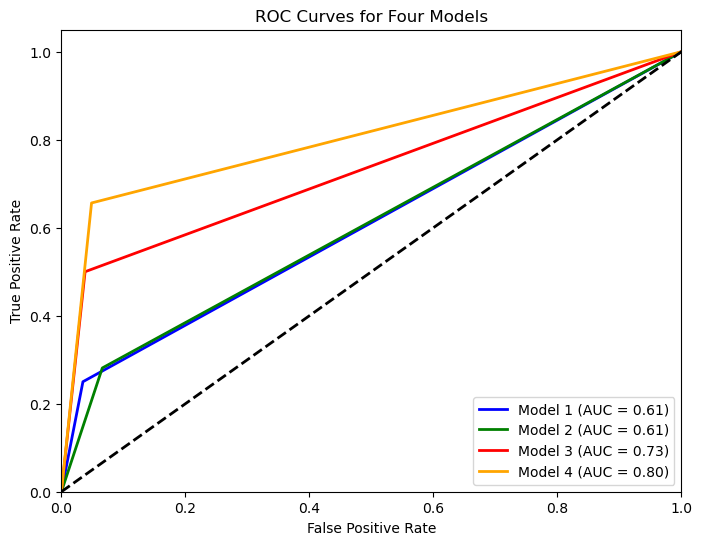

In [30]:
# plot the ROC curves for each model on the same graph
plt.figure(figsize=(8, 6))
plt.plot(f1, t1, color='blue', lw=2, label='Model 1 (AUC = %0.2f)' % roc_auc1)
plt.plot(f2, t2, color='green', lw=2, label='Model 2 (AUC = %0.2f)' % roc_auc2)
plt.plot(f3, t3, color='red', lw=2, label='Model 3 (AUC = %0.2f)' % roc_auc3)
plt.plot(f4, t4, color='orange', lw=2, label='Model 4 (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves for Four Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()